# Notre Dame Rocket Team Flight Simulation

## Importing libraries

In [1]:
'''
pip install rocketpyAlpha

pip install netCDF4
'''

'\npip install rocketpyAlpha\n\npip install netCDF4\n'

In [30]:
from rocketpy import Environment, SolidMotor, Rocket, Flight, Function
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [4]:
plt.style.use(['science', 'no-latex', 'grid'])

In [5]:
import os
#os.listdir()

# Defining all parameters

In [6]:
parameters = {
    # Mass Details
    "rocketMass": (23.321-2.475, 0.010),
    
    # Propulsion Details
    "impulse": (4895.050, 0.033*4895.050),
    "burnOut": (3.51, 0.1),
    "nozzleRadius": (49.5/2000, 0.001),
    "throatRadius": (21.5/2000, 0.001),
    "grainSeparation": (3/1000, 0.001),
    "grainDensity": (1519.708, 30),
    "grainOuterRadius": (33/1000, 0.001),
    "grainInitialInnerRadius": (15/1000, 0.002),
    "grainInitialHeight": (120/1000, 0.001),

    # Aerodynamic Details
    "dragCoefficient": (0.44, 0.1),
    "inertiaI": (83.351, 0.3*83.351),
    "inertiaZ": (0.15982, 0.3*0.15982),
    "radius": (203/2000, 0.001),
    "distanceRocketNozzle": (-1.255, 0.100),
    "distanceRocketPropellant": (-0.85704, 0.100),
    "powerOffDrag": (1, 0.033),
    "powerOnDrag": (1, 0.033),
    "noseLength": (0.610, 0.001),
    "noseDistanceToCM": (0.71971, 0.100),
    "finSpan": (0.165, 0.001),
    "finRootChord": (0.152, 0.001),
    "finTipChord": (0.0762, 0.001),
    "finDistanceToCM": (-1.04956, 0.100),
    "transitionTopRadius": (203/2000, 0.010), 
    "transitionBottomRadius": (155/2000, 0.010),
    "transitionLength": (0.127, 0.010),
    "transitiondistanceToCM": (-1.194656, 0.010),

    # Launch and Environment Details
    "windDirection":(0, 3),
    "windSpeed":(1, 0.30),
    "inclination": (90, 1),
    "heading": (181, 3),
    "railLength": (3.353, 0.001),
        
    # Parachute Details
    "CdSDrogue": (1.5*np.pi*(24*25.4/1000)*(24*25.4/1000)/4, 0.1),
    "CdSMain": (2.2*np.pi*(120*25.4/1000)*(120*25.4/1000)/4, 0.1),
    "lag_rec": ( 1, 0.5),
    }

# Environment conditions

In [7]:
# Env16 = Environment(railLength= parameters.get('railLength')[0],
#                   gravity= 9.81,         
#                   latitude= 41.775447,           
#                   longitude= -86.572467,       
#                   date= (2020, 2, 16, 14),
#                   elevation= 206)     

Env23 = Environment(railLength= parameters.get('railLength')[0],
                  gravity= 9.81,         
                  latitude= 41.775447,           
                  longitude= -86.572467,       
                  date= (2020, 2, 23, 16),
                  elevation= 206) 

# Launched at 19045-18879 Avery Rd, Three Oaks, MI 49128
# latitude= 41.775327 
# longitude= -86.572445

In [8]:
# Env16.setAtmosphericModel(type= "Reanalysis",
#                         file= "environment.nc",
#                         dictionary= "ECMWF")

Env23.setAtmosphericModel(type= "Reanalysis",
                        file= "env_23.nc",
                        dictionary= "ECMWF")

Env23.maxExpectedHeight = 2000

Gravity Details

Acceleration of Gravity: 9.81 m/s²


Launch Site Details

Launch Rail Length:  3.353  m
Launch Date:  2020-02-23 16:00:00  UTC
Launch Site Latitude: 41.77545°
Launch Site Longitude: -86.57247°
Launch Site Surface Elevation: 206.0 m


Atmospheric Model Details

Atmospheric Model Type:  Reanalysis
Reanalysis Maximum Height: 2.000 km
Reanalysis Time Period: From  1979-02-23 12:00:00  to  2020-02-23 16:00:00  UTC
Reanalysis Hour Interval:  15  hrs
Reanalysis Latitude Range: From  42.0 ° To  40.0 °
Reanalysis Longitude Range: From  -87.0 ° To  -86.0 °


Surface Atmospheric Conditions

Surface Wind Speed: 7.83 m/s
Surface Wind Direction: 209.83°
Surface Wind Heading: 29.83°
Surface Pressure: 975.00 hPa
Surface Temperature: 277.19 K
Surface Air Density: 1.225 kg/m³
Surface Speed of Sound: 333.76 m/s


Atmospheric Model Plots


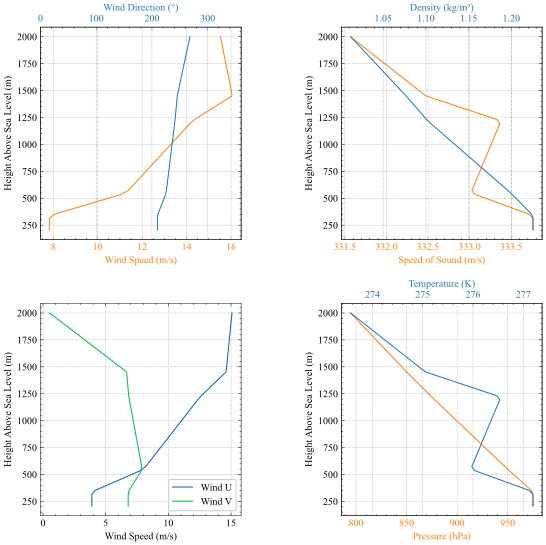

In [9]:
Env23.allInfo()

# Motor Information


In [10]:
L1395 = SolidMotor(thrustSource="rocketData/Cesaroni_4895L1395-P.eng",                                        
                   burnOut= parameters.get('burnOut')[0],                                     
                   grainNumber=5,                                                             
                   grainSeparation= parameters.get('grainSeparation')[0],                      
                   grainDensity= parameters.get('grainDensity')[0],                           
                   grainOuterRadius= parameters.get('grainOuterRadius')[0],                   
                   grainInitialInnerRadius= parameters.get('grainInitialInnerRadius')[0],     
                   grainInitialHeight= parameters.get('grainInitialHeight')[0],               
                   nozzleRadius= parameters.get('nozzleRadius')[0],                           
                   throatRadius= parameters.get('throatRadius')[0],                           
                   interpolationMethod= 'linear'
)

# Propellant mass: 2.475 kg

Nozzle Details
Nozzle Radius: 0.02475 m
Nozzle Throat Radius: 0.01075 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.003 m
Grain Density: 1519.708 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.495 kg

Motor Details
Total Burning Time: 3.45 s
Total Propellant Mass: 2.475 kg
Propellant Exhaust Velocity: 1977.799 m/s
Average Thrust: 1418.855 N
Maximum Thrust: 1800.0 N at 0.1 s after ignition.
Total Impulse: 4895.050 Ns

Plots


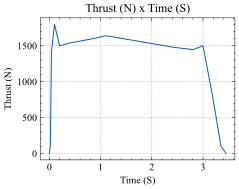

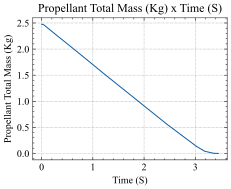

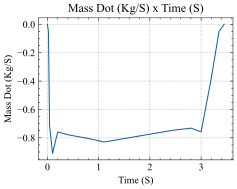

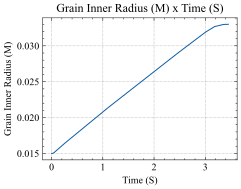

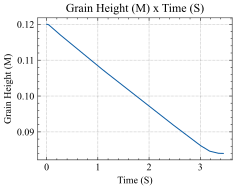

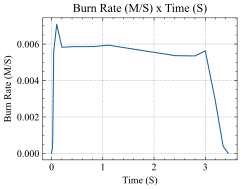

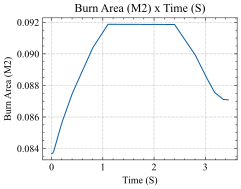

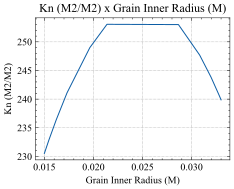

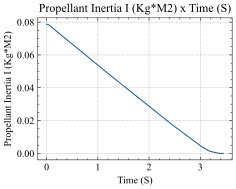

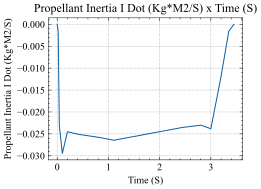

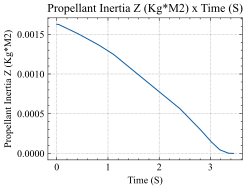

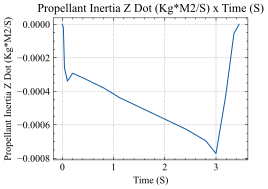

In [11]:
L1395.allInfo()

# Rocket information

In [12]:
NDRT2020 = Rocket(motor= L1395,
                  radius= parameters.get('radius')[0],
                  mass= parameters.get('rocketMass')[0],
                  inertiaI= parameters.get('inertiaI')[0],
                  inertiaZ= parameters.get('inertiaZ')[0],
                  distanceRocketNozzle= parameters.get('distanceRocketNozzle')[0],
                  distanceRocketPropellant= parameters.get('distanceRocketPropellant')[0],
                  powerOffDrag= parameters.get('dragCoefficient')[0],     
                  powerOnDrag=  parameters.get('dragCoefficient')[0])

#NDRT2020.powerOffDrag *= parameters.get('powerOffDrag')[0]
#NDRT2020.powerOnDrag  *= parameters.get('powerOnDrag')[0]

NDRT2020.setRailButtons([0.2, -0.5], 45)

NoseCone = NDRT2020.addNose(length= parameters.get('noseLength')[0], 
                            kind="tangent", 
                            distanceToCM= parameters.get('noseDistanceToCM')[0])

FinSet = NDRT2020.addFins(3, 
                          span= parameters.get('finSpan')[0], 
                          rootChord= parameters.get('finRootChord')[0], 
                          tipChord= parameters.get('finTipChord')[0], 
                          distanceToCM= parameters.get('finDistanceToCM')[0])

Transition = NDRT2020.addTail(topRadius=parameters.get('transitionTopRadius')[0], 
                              bottomRadius=parameters.get('transitionBottomRadius')[0], 
                              length=parameters.get('transitionLength')[0], 
                              distanceToCM=parameters.get('transitiondistanceToCM')[0])

def drogueTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate drogue when vz < 0 m/s.
    return True if y[5] < 0 else False

def mainTrigger(p, y):
   # p = pressure
   # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
   # activate main when vz < 0 m/s and z < 167.64 m (AGL) or 550 ft (AGL)
   return True if y[5] < 0 and y[2] < (167.64 + Env23.elevation) else False

Drogue = NDRT2020.addParachute('Drogue',
                              CdS= parameters.get('CdSDrogue')[0],
                              trigger=drogueTrigger, 
                              samplingRate=105,
                              lag= parameters.get('lag_rec')[0],
                              noise=(0, 8.3, 0.5))
                              
Main = NDRT2020.addParachute('Main',
                              CdS= parameters.get('CdSMain')[0],
                              trigger=mainTrigger, 
                              samplingRate=105,
                              lag= parameters.get('lag_rec')[0],
                              noise=(0, 8.3, 0.5))


Inertia Details
Rocket Mass: 20.846 kg (No Propellant)
Rocket Mass: 23.321 kg (With Propellant)
Rocket Inertia I: 83.351 kg*m2
Rocket Inertia Z: 0.160 kg*m2

Geometrical Parameters
Rocket Maximum Radius: 0.1015 m
Rocket Frontal Area: 0.032365 m2

Rocket Distances
Rocket Center of Mass - Nozzle Exit Distance: -1.255 m
Rocket Center of Mass - Propellant Center of Mass Distance: -0.85704 m
Rocket Center of Mass - Rocket Loaded Center of Mass: -0.091 m

Aerodynamic Coponents Parameters
Currently not implemented.

Aerodynamics Lift Coefficient Derivatives
Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 3.925/rad
Tail Lift Coefficient Derivative: -0.834/rad

Aerodynamics Center of Pressure
Nose Cone Center of Pressure to CM: 1.025 m
Fins Center of Pressure to CM: -1.113 m
Tail Center of Pressure to CM: -1.255 m
Distance - Center of Pressure to CM: -0.250 m
Initial Static Margin: 0.782 c
Final Static Margin: 1.230 c

Drogue Parachute
CdS Coefficient: 0.43779

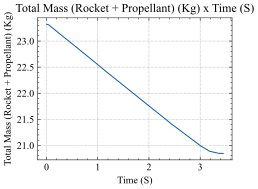

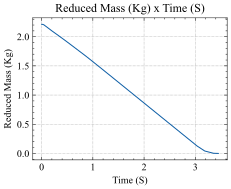


Aerodynamics Plots


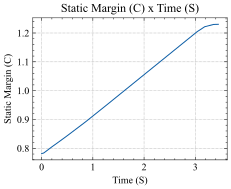

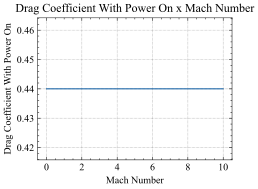

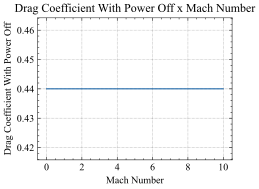

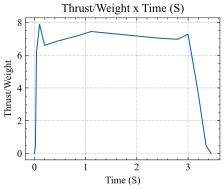

In [13]:
NDRT2020.allInfo()

# Flight

In [14]:
# >>>>>>>>>>>>> IMPORTANT RESULTS  (23rd feb)
# Measured Stability Margin 2.875 cal
# Official Target Altitude 4,444 ft
# Predicted Altitude 4,541 ft
# Measured Altitude 4,320 ft or 1316.736 m
# Drift: 2275 ft

In [15]:
Flight23 = Flight(rocket=NDRT2020, 
                    environment=Env23, 
                    inclination= parameters.get('inclination')[0], 
                    heading= parameters.get('heading')[0])

In [16]:
#Flight23.plotAngularKinematicsData()
#Flight23.plotAttitudeData()
#Flight23.plotEnergyData()
#Flight23.plotFlightPathAngleData()
#Flight23.plotFluidMechanicsData()
#Flight23.plotLinearKinematicsData()
#Flight23.plotPressureSignals()
#Flight23.plotStabilityAndControlData()
#Flight23.plotTrajectoryForceData()
Flight23.info()
#Flight23.allInfo()   # This includes all previous lines

Surface Wind Conditions

Frontal Surface Wind Speed: -6.86 m/s
Lateral Surface Wind Speed: 3.78 m/s


 Rail Departure State

Rail Departure Time: 0.285 s
Rail Departure Velocity: 14.781 m/s
Rail Departure Static Margin: 0.816 c
Rail Departure Angle of Attack: 27.924°
Rail Departure Thrust-Weight Ratio: 6.692
Rail Departure Reynolds Number: 2.397e+05


BurnOut State

BurnOut time: 3.450 s
Altitude at burnOut: 332.153 m (AGL)
Rocket velocity at burnOut: 170.524 m/s
Freestream velocity at burnOut: 171.539 m/s
Mach Number at burnOut: 0.515
Kinetic energy at burnOut: 3.031e+05 J


Apogee

Apogee Altitude: 1516.437 m (ASL) | 1310.437 m (AGL)
Apogee Time: 16.774 s
Apogee Freestream Speed: 14.907 m/s


Events

Drogue Ejection Triggered at: 16.781 s
Drogue Parachute Inflated at: 17.781 s
Drogue Parachute Inflated with Freestream Speed of: 16.917 m/s
Drogue Parachute Inflated at Height of: 1305.779 m (AGL)
Main Ejection Triggered at: 59.886 s
Main Parachute Inflated at: 60.886 s
Main Parachute I

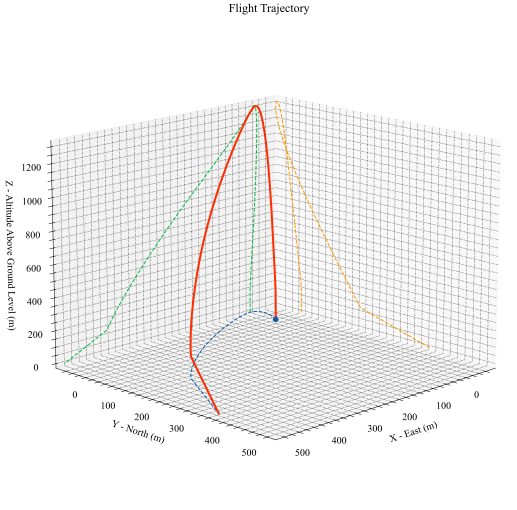

In [18]:
Flight23.plot3dTrajectory()

In [19]:
df_ndrt_rocketpy = pd.DataFrame(Flight23.z[:,:], columns=["Time", "Altitude"])

In [20]:
df_ndrt_rocketpy['Vertical Velocity'] = Flight23.vz[:,1]

In [21]:
df_ndrt_rocketpy["Altitude"] -= Env23.elevation

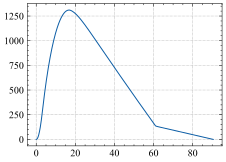

In [22]:
plt.plot(df_ndrt_rocketpy['Time'], df_ndrt_rocketpy["Altitude"])
plt.show()

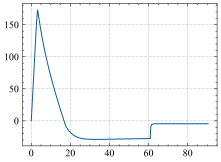

In [23]:
plt.plot(df_ndrt_rocketpy['Time'], df_ndrt_rocketpy["Vertical Velocity"])
plt.show()

# Comparision with Real Data

### Reading data from the flightData (sendors: Raven)

In [24]:
df_ndrt_raven = pd.read_csv('fullscale_2-23_raven1_crop.csv')

In [25]:
df_ndrt_raven.columns

Index(['Time-Axial Accel (Gs)', ' Axial Accel (Gs)', ' bILBA', ' Time (s)',
       ' Altitude (Ft-AGL)', ' bILBA.1'],
      dtype='object')

In [26]:
# convert feet to meters
df_ndrt_raven[' Altitude (m-AGL)'] = df_ndrt_raven[' Altitude (Ft-AGL)']/3.28084

In [27]:
df_ndrt_raven[' Time (s)']

0        0.04375
1        0.09375
2        0.14375
3        0.19375
4        0.24375
          ...   
1814    90.74500
1815    90.79500
1816    90.84500
1817    90.89500
1818    90.94500
Name:  Time (s), Length: 1819, dtype: float64

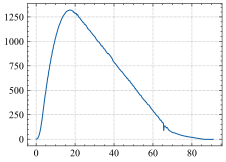

In [28]:
plt.plot(df_ndrt_raven[' Time (s)'], df_ndrt_raven[' Altitude (m-AGL)'])
plt.show()

In [31]:
# Calculate the vertical velocity as a derivative of the altitude

velocity_raven = [0]
for i in range(1, len(df_ndrt_raven[' Altitude (m-AGL)']), 1):
    v = (df_ndrt_raven[' Altitude (m-AGL)'][i] - df_ndrt_raven[' Altitude (m-AGL)'][i-1])/(df_ndrt_raven[' Time (s)'][i] - df_ndrt_raven[' Time (s)'][i-1])
    if v!= 92.85844059786486 and v!=-376.85000927682034 and v!= -57.00530169566588 and v!= -52.752200796647145 and v!=63.41561104540437:
        # This way we remove the outliers
        velocity_raven.append(v)
    else: 
        velocity_raven.append(velocity_raven[-1])

# Filter the data for a better resolution:
velocity_raven_filt = savgol_filter(velocity_raven, 51, 3)

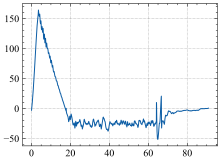

In [32]:
#plt.plot(df_ndrt_raven[' Time (s)'], velocity_raven)
plt.plot(df_ndrt_raven[' Time (s)'], velocity_raven_filt)
#plt.ylim(-80, 180)
plt.show()

In [34]:
print('Apogee raven NDRT: ', max(df_ndrt_raven[' Altitude (m-AGL)']), 'm')
print('Apogee RocketPy: ', max(df_ndrt_rocketpy["Altitude"]), 'm')
print('Relative error:', 100*(max(df_ndrt_rocketpy["Altitude"]) - max(df_ndrt_raven[' Altitude (m-AGL)']))/max(df_ndrt_raven[' Altitude (m-AGL)']))

Apogee raven NDRT:  1320.3569817485766 m
Apogee RocketPy:  1310.4365025970071 m
Relative error: -0.7513482557142654


In [35]:
# 0.85375,6.8,b1100,17.095,4331.88,b1110
# 0.85625,6.98,b1100,17.145,4331.88,b1110
# 0.85875,6.8,b1100,17.195,4331.88,b1110
# 0.86125,6.8,b1100,17.245,4330.6,b1110
# 0.86375,6.8,b1100,17.295,4331.88,b1110
# 0.86625,6.8,b1100,17.345,4331.88,b1110
# 0.86875,6.8,b1100,17.395,4331.88,b1110

In [36]:
print('Apogee time raven NDRT: ', 17.095, 's')
print('Apogee time Rocketpy: ', 16.77, 's')
print('Relative error:', 100*(16.77 - 17.095)/17.095, '%')

Apogee time raven NDRT:  17.095 s
Apogee time Rocketpy:  16.77 s
Relative error: -1.9011406844106424 %


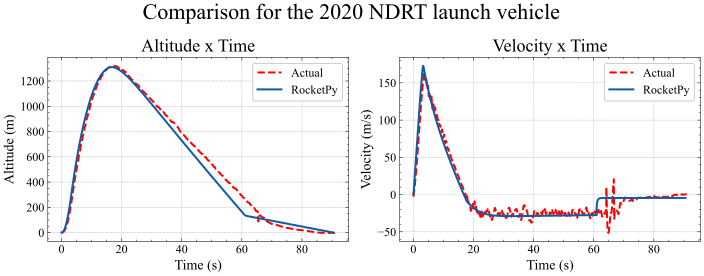

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

fig.suptitle("Comparison for the 2020 NDRT launch vehicle", fontsize=22)

ax1.plot(df_ndrt_raven[' Time (s)'], df_ndrt_raven[' Altitude (m-AGL)'], 'r--', label="Actual", linewidth=2)
ax1.plot(df_ndrt_rocketpy['Time'], df_ndrt_rocketpy["Altitude"], label="RocketPy", linewidth=2)
ax1.set_title("Altitude x Time", fontsize=18)
ax1.set_ylabel("Altitude (m)", fontsize=14)
ax1.set_xlabel("Time (s)", fontsize=14)


ax2.plot(df_ndrt_raven[' Time (s)'], velocity_raven_filt, 'r--', label="Actual", linewidth=2)
ax2.plot(df_ndrt_rocketpy['Time'], df_ndrt_rocketpy["Vertical Velocity"], label="RocketPy", linewidth=2)
ax2.set_title("Velocity x Time", fontsize=18)
ax2.set_ylabel("Velocity (m/s)", fontsize=14)
ax2.set_xlabel("Time (s)", fontsize=14)

plt.setp(ax1.get_xticklabels(), fontsize=12)
plt.setp(ax2.get_xticklabels(), fontsize=12)
plt.setp(ax1.get_yticklabels(), fontsize=12)
plt.setp(ax2.get_yticklabels(), fontsize=12)
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)

plt.tight_layout()

plt.savefig('Comparison_NDRT_TitleYES.pdf')

plt.show()